## Predicting Annual Income

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
sns.set()
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### Data Cleaning

In [2]:
df=pd.read_csv(r'C:\Users\dorot\Downloads\ML\adult\adult.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Martial_Status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32561, 15)

In [7]:
df.describe()

,Age,Fnlwgt,Education-num,Capital_gain,Capital_loss,Hours_per_week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Income            0
dtype: int64

In [11]:
df[df.duplicated()]

,Age,Workclass,Fnlwgt,Education,Education-num,Martial_Status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [13]:
df.drop_duplicates(inplace=True)
df.shape

(32537, 15)

In [15]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Income'],
      dtype='object')

In [17]:
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
df[df['Workclass']==' ?']

,Age,Workclass,Fnlwgt,Education,Education-num,Martial_Status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [21]:
df.replace(' ?',np.nan,inplace=True)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Gender               0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Country            582
Income               0
dtype: int64

In [23]:
df.drop(columns={'Workclass','Occupation'},inplace=True)

In [25]:
df.dropna(inplace=True)

In [27]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [29]:
cat_cols=df.select_dtypes(include=object)
for col in cat_cols:
    df[col] = df[col].str.strip()

### Exploratory Data Analysis

In [31]:
df['Income'].value_counts()

Income
<=50K    24262
>50K      7693
Name: count, dtype: int64

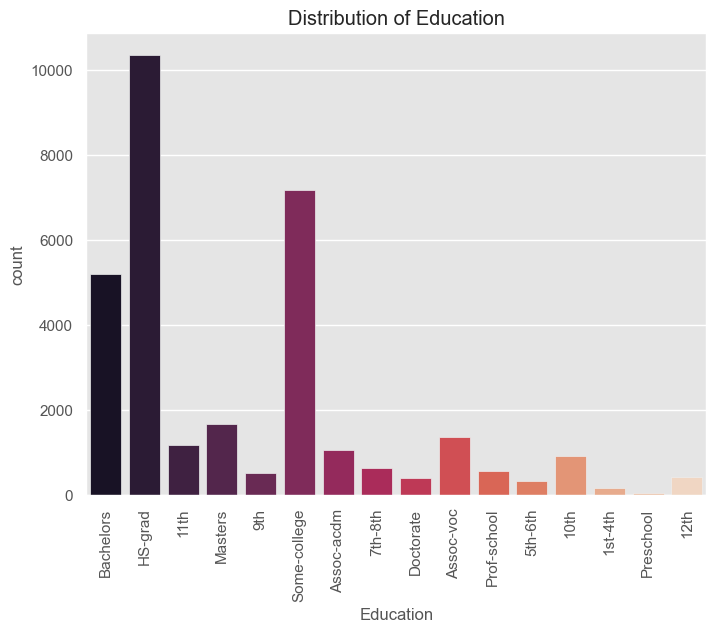

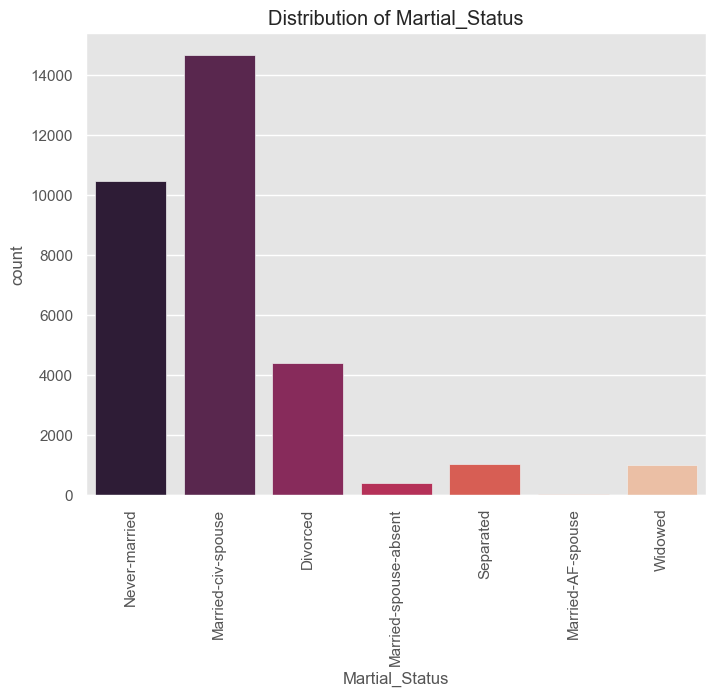

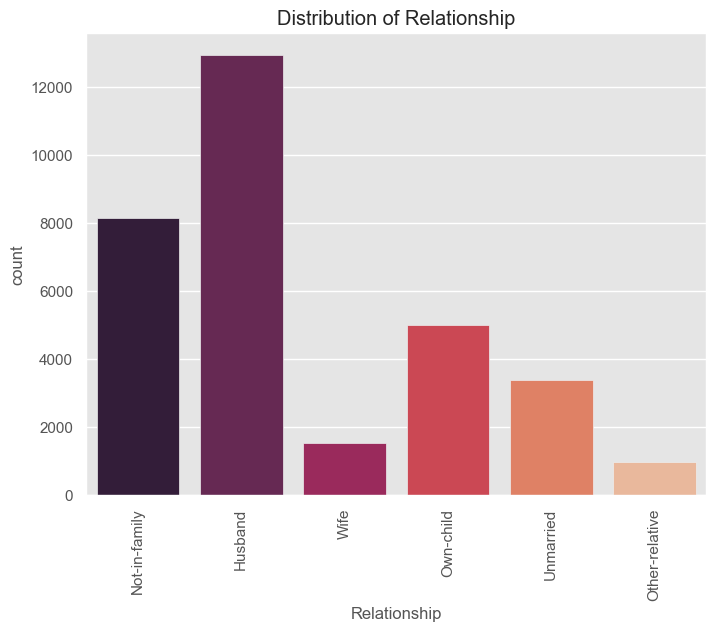

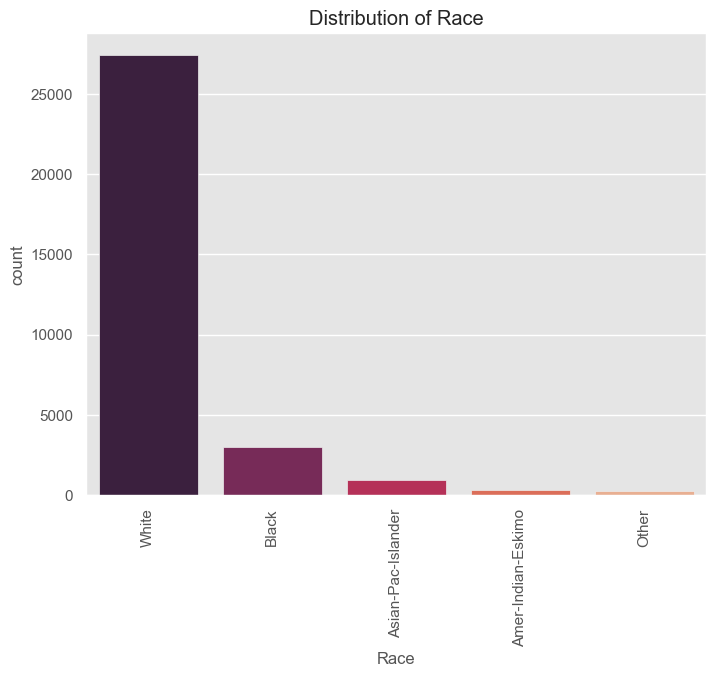

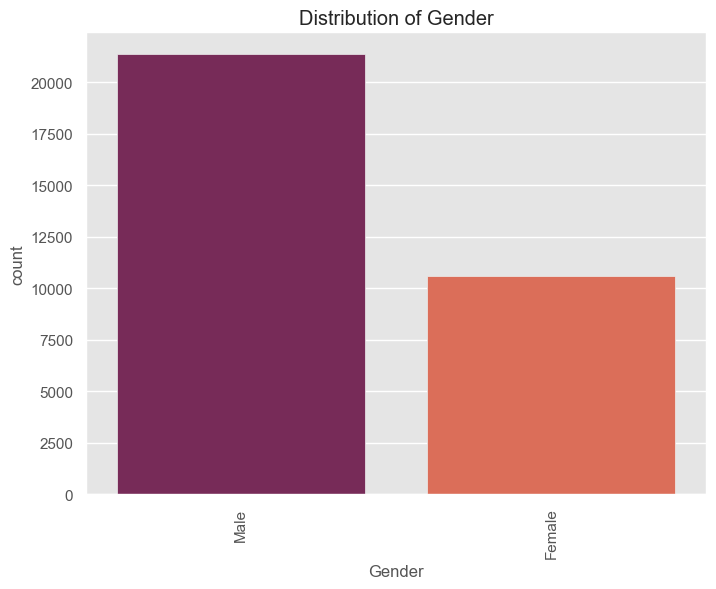

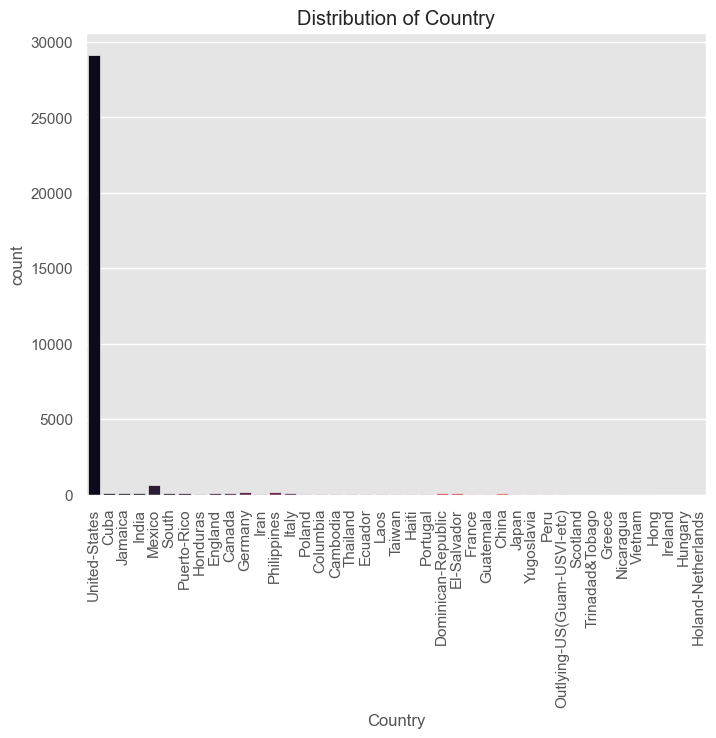

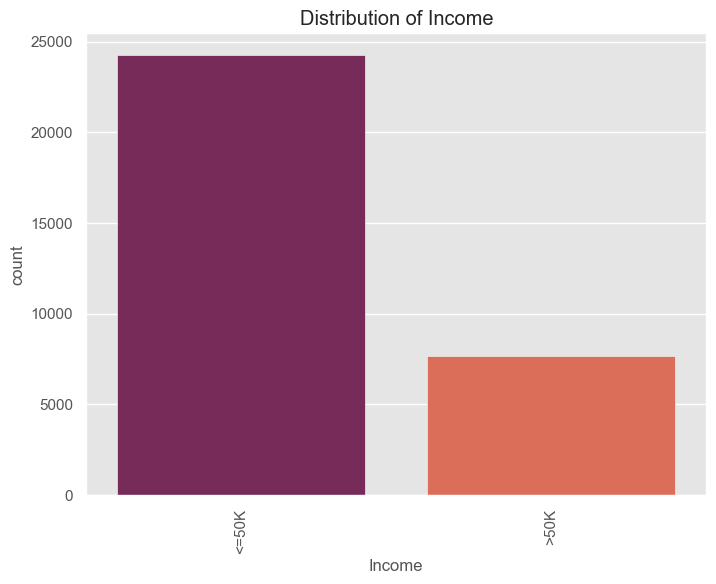

In [33]:
for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=df[col],hue=df[col],palette='rocket')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

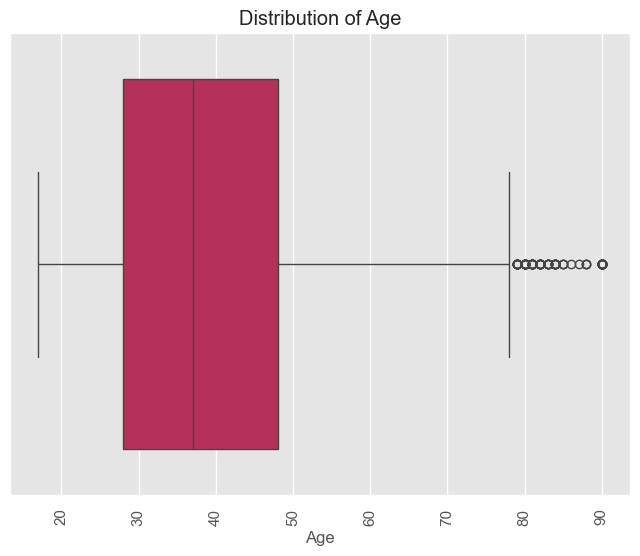

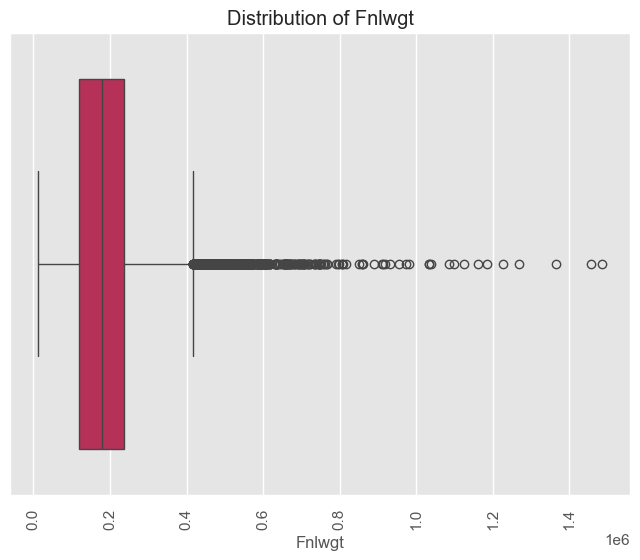

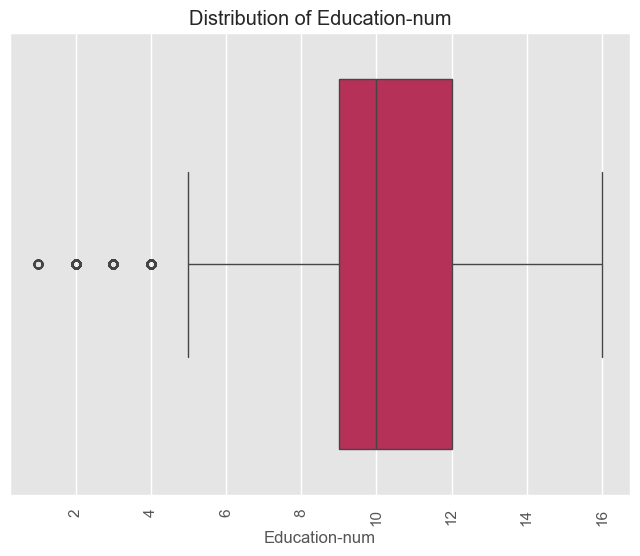

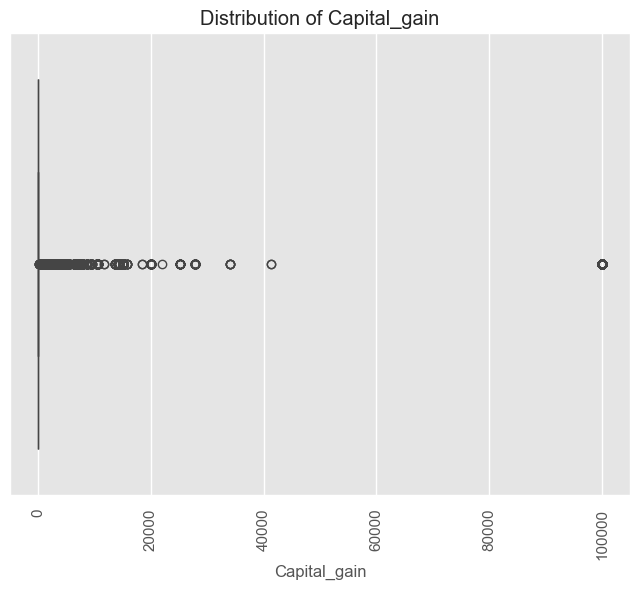

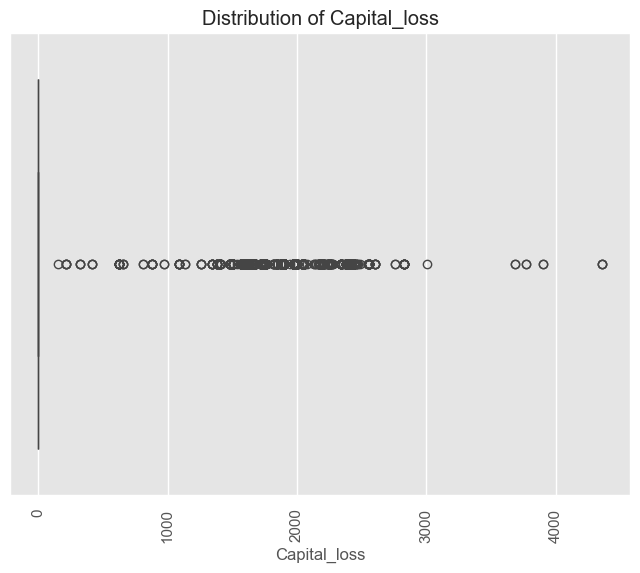

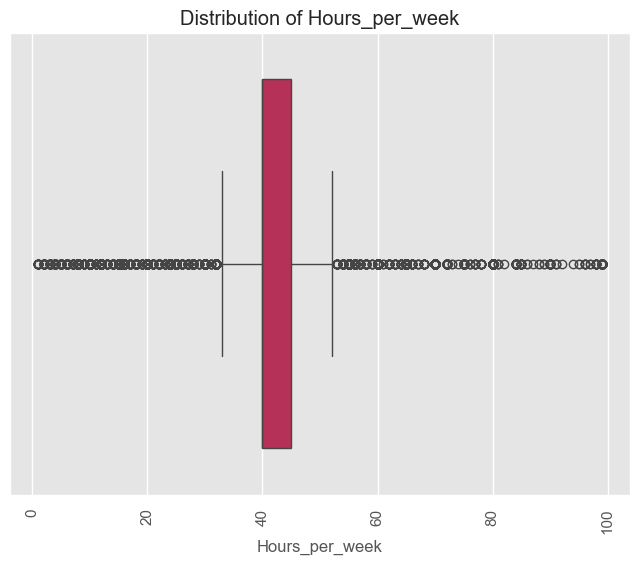

In [35]:
num_cols=df.select_dtypes(include=[int,float])
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df,x=df[col],palette='rocket')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

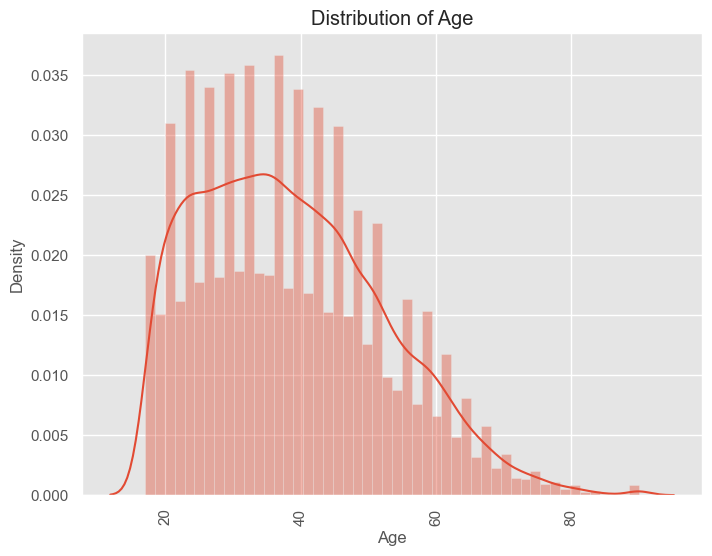

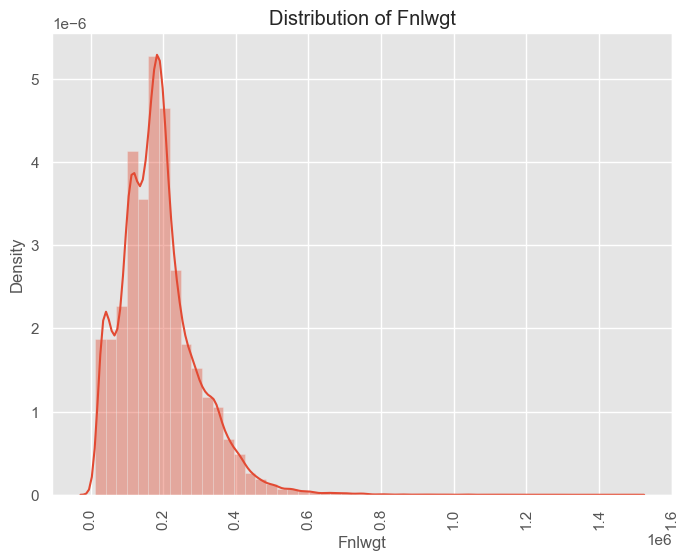

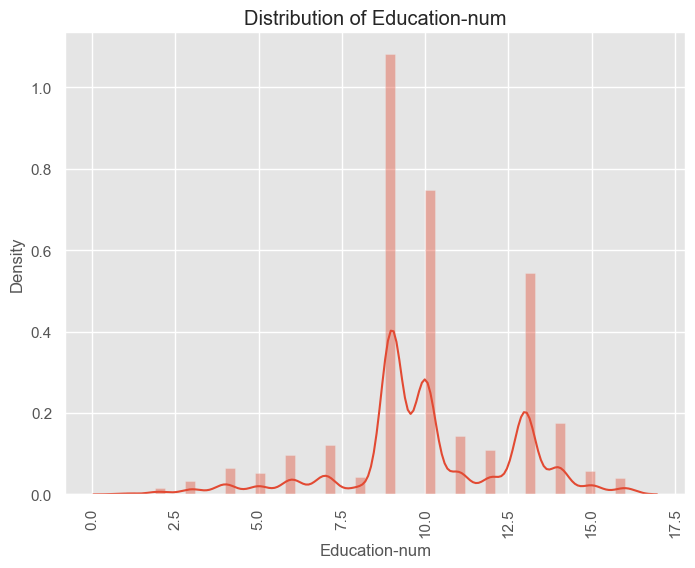

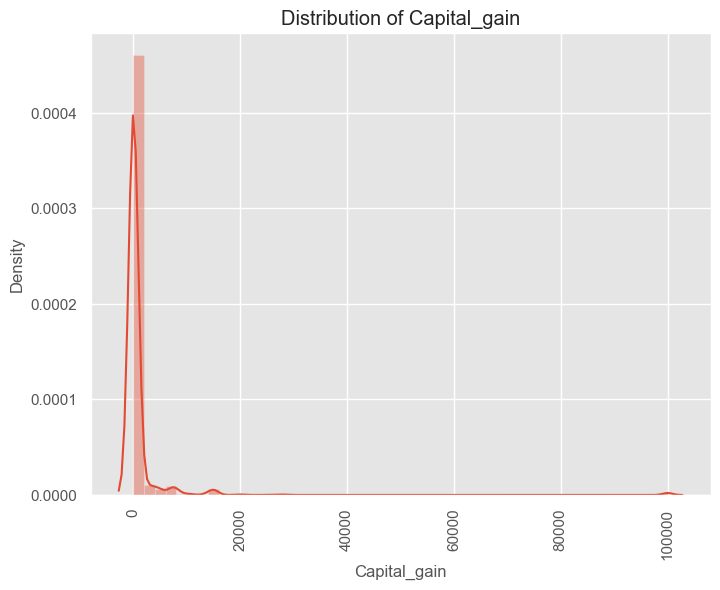

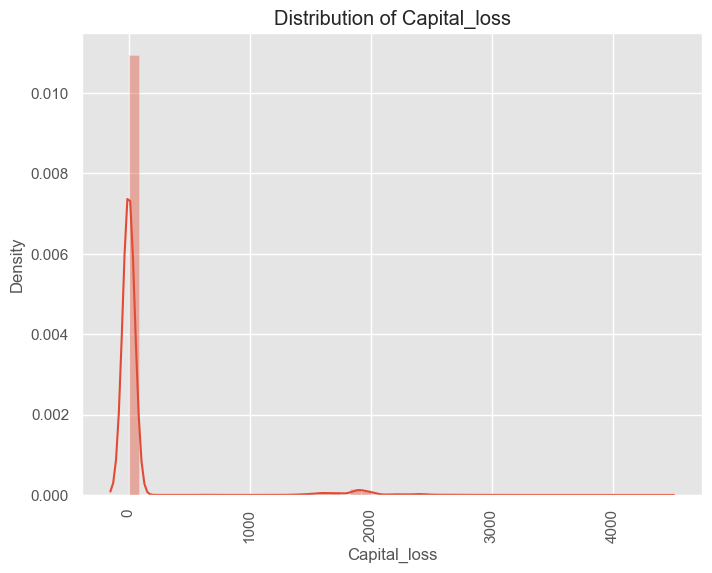

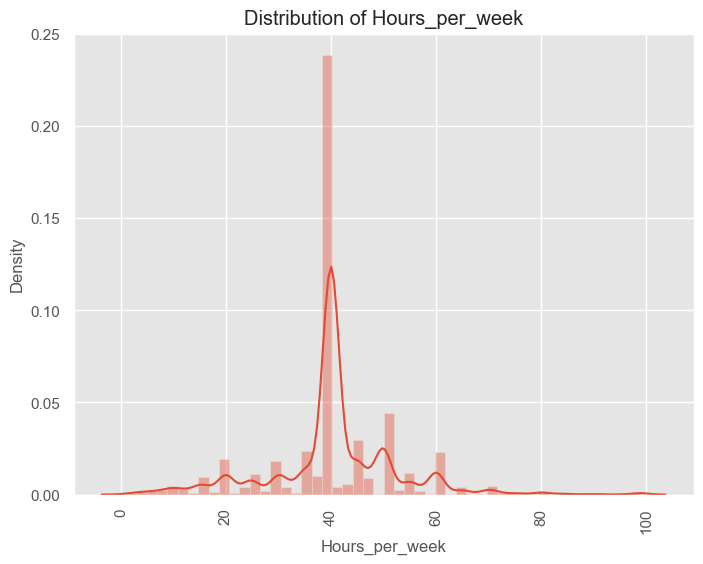

In [37]:
num_cols=df.select_dtypes(include=[int,float])
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.distplot(x=df[col])
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

### Feature Engineering

In [39]:
df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [41]:
df['Income'].replace({'<=50K':0,'>50K':1},inplace=True)

In [43]:
cat_cols=df.select_dtypes(include=object)
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values ({df[col].nunique()}): {df[col].unique()}")
    print("-" * 40)


Column: Education
Unique values (16): ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------------------------------------

Column: Martial_Status
Unique values (7): ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
----------------------------------------

Column: Relationship
Unique values (6): ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
----------------------------------------

Column: Race
Unique values (5): ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
----------------------------------------

Column: Gender
Unique values (2): ['Male' 'Female']
----------------------------------------

Column: Country
Unique values (41): ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Ir

In [45]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [47]:
df.drop('Fnlwgt',axis=1,inplace=True)

In [49]:
df.drop(columns={'Education','Martial_Status','Relationship'},inplace=True)

In [165]:
columns=['Workclass','Martial_Status','Relationship','Race']
for col in columns:
    ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
    encoded=ohe.fit_transform(df[[col]])
    one_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([col]),index=df.index)

    df = pd.concat([df.drop(col, axis=1), one_df], axis=1)
df.head()

,Age,Fnlwgt,Education-num,Occupation,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Martial_Status_Divorced,Martial_Status_Married-AF-spouse,Martial_Status_Married-civ-spouse,Martial_Status_Married-spouse-absent,Martial_Status_Never-married,Martial_Status_Separated,Martial_Status_Widowed,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,39,77516,13,0,0,2174,0,40,38,<=50K,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,50,83311,13,3,0,0,0,13,38,<=50K,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,38,215646,9,5,0,0,0,40,38,<=50K,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,53,234721,7,5,0,0,0,40,38,<=50K,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,28,338409,13,9,1,0,0,40,4,<=50K,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [51]:
df['Gain'] = np.where(df['Capital_gain'] > 0, 1, 0)
df['Loss'] = np.where(df['Capital_loss'] > 0, 1, 0)

In [53]:
df.head()

,Age,Education-num,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income,Gain,Loss
0,39,13,White,0,2174,0,40,United-States,0,1,0
1,50,13,White,0,0,0,13,United-States,0,0,0
2,38,9,White,0,0,0,40,United-States,0,0,0
3,53,7,Black,0,0,0,40,United-States,0,0,0
4,28,13,Black,1,0,0,40,Cuba,0,0,0


In [55]:
df.drop(columns={'Race','Country'},inplace=True)

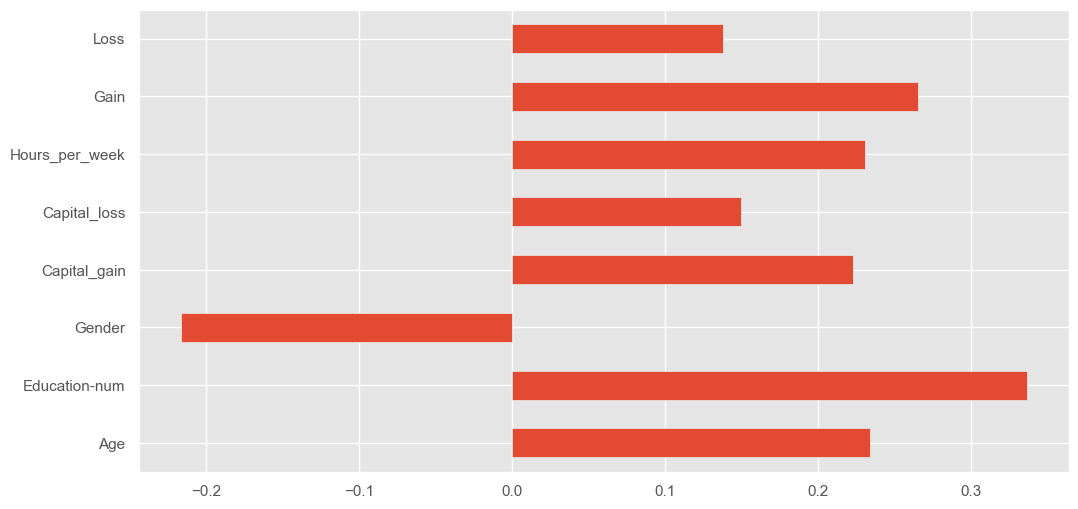

In [57]:
correlation_values = df.select_dtypes(include=[int,float]).corr()['Income'].drop('Income')
correlation_values.plot(kind='barh', figsize=(12, 6))
plt.show()

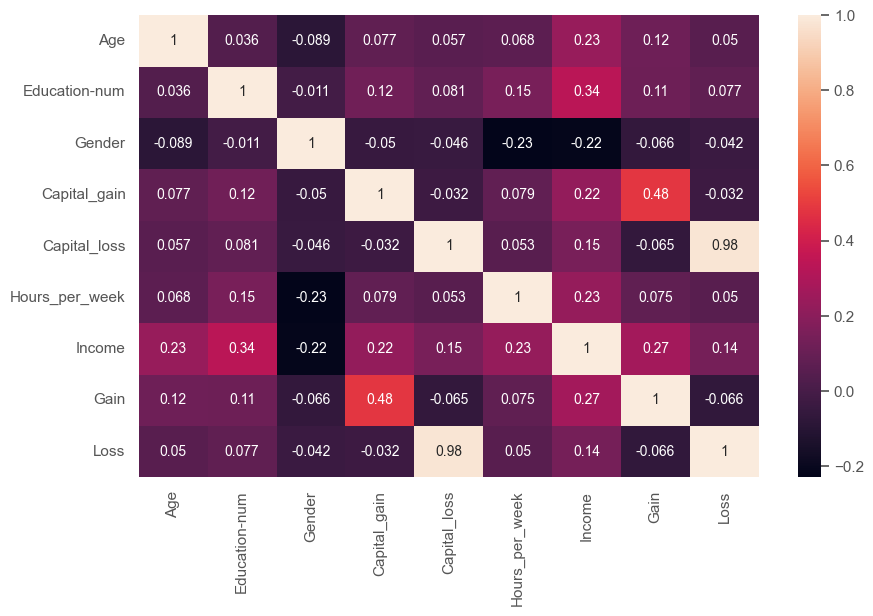

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[int,float]).corr(),annot=True)
plt.show()

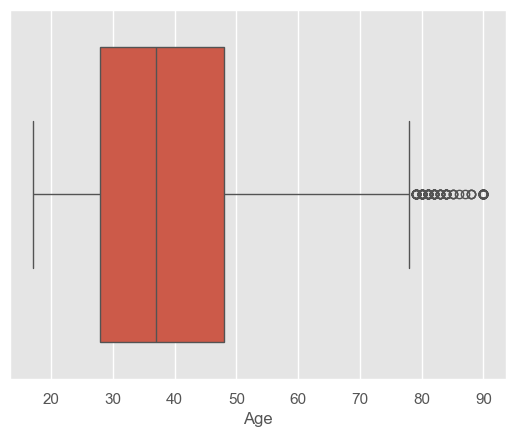

In [61]:
sns.boxplot(data=df,x=df['Age'])
plt.show()

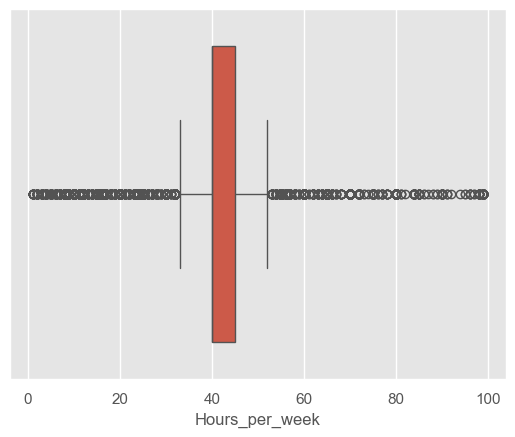

In [63]:
sns.boxplot(data=df,x=df['Hours_per_week'])
plt.show()

In [65]:
df[['Age','Hours_per_week']].describe()

,Age,Hours_per_week
count,31955.00,31955.00
mean,38.58,40.42
std,13.66,12.34
min,17.00,1.00
25%,28.00,40.00
50%,37.00,40.00
75%,48.00,45.00
max,90.00,99.00


In [69]:
print('Median Age: ',df['Age'].median())
print('Median Hours: ',df['Hours_per_week'].median())

Median Age:  37.0
Median Hours:  40.0


In [71]:
percentile25=df['Age'].quantile(0.25)
percentile75=df['Age'].quantile(0.75)
IQR=percentile75-percentile25
upper_limit=percentile75+1.5*IQR

df=df[df['Age']<=upper_limit]
df.reset_index(inplace=True,drop=True)
#df.drop('index',axis=1,inplace=True)

In [73]:
percentile25=df['Hours_per_week'].quantile(0.25)
percentile75=df['Hours_per_week'].quantile(0.75)
IQR=percentile75-percentile25
upper_limit=percentile75+1.5*IQR
lower_limit=percentile75-1.5*IQR
print('Upper: ',upper_limit)
print('Lower: ',lower_limit)

Upper:  52.5
Lower:  37.5


In [75]:
df=df[(df['Hours_per_week']>lower_limit) | (df['Hours_per_week']<upper_limit)]

In [77]:
df['Income'].value_counts()

Income
0    24148
1     7668
Name: count, dtype: int64

### Modeling

In [81]:
df.head()

,Age,Education-num,Gender,Capital_gain,Capital_loss,Hours_per_week,Income,Gain,Loss
0,39,13,0,2174,0,40,0,1,0
1,50,13,0,0,0,13,0,0,0
2,38,9,0,0,0,40,0,0,0
3,53,7,0,0,0,40,0,0,0
4,28,13,1,0,0,40,0,0,0


In [141]:
X=df.drop({'Income','Gain','Loss'},axis=1)
y=df['Income']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [143]:
#cat_cols = X.select_dtypes(include='object').columns.to_list()
num_cols = X.select_dtypes(include='number').drop(['Education-num','Gender'],axis=1).columns.to_list()
binary_cols = ['Gender','Education-num']

In [145]:
'''cat_pipe=Pipeline(steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])'''
num_pipe=Pipeline(steps=[
    ('scaler',StandardScaler())
])

In [147]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        #('cat', cat_pipe, cat_cols),
        ('bin', 'passthrough', binary_cols)
    ]
)

In [149]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [119]:
param_grid = [{
    'classifier__n_estimators': [100, 1000],
    'classifier__max_depth': [ 4, 8, 12],
    'classifier__min_samples_split': [6, 8, 12],
    'classifier__criterion': ['entropy', 'gini'],
    'classifier__class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}]
}]

cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'classifier__class_weight': {0: 1, 1: 2}, 'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 1000}
0.8329796601653443


In [151]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
       class_weight={0: 1, 1: 2}, criterion= 'entropy', max_depth= 8, min_samples_split= 8, n_estimators= 1000
    ))
])

Accuracy: 82.92
Classification report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4830
           1       0.66      0.60      0.63      1534

    accuracy                           0.83      6364
   macro avg       0.77      0.75      0.76      6364
weighted avg       0.82      0.83      0.83      6364



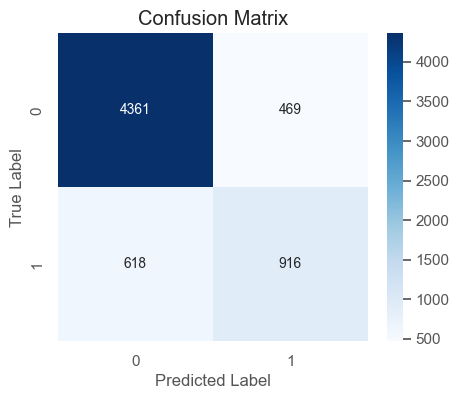

In [153]:
#rf=RandomForestClassifier(class_weight= {0: 1, 1: 2}, criterion= 'entropy', max_depth= 12, min_samples_split= 8,n_estimators=1000)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('Classification report')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

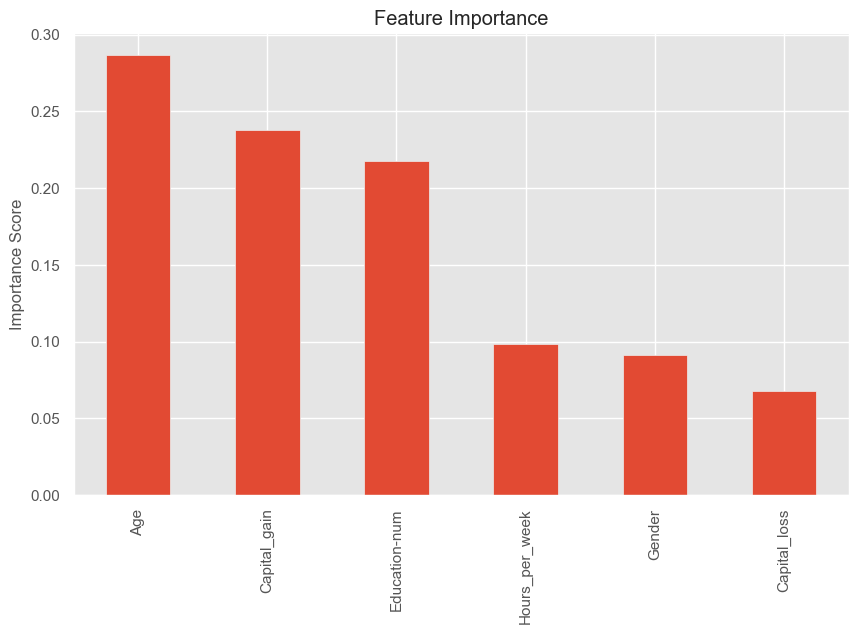

In [155]:
model = pipeline.named_steps['classifier']
#ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['ohe']
#cat_feature_names = ohe.get_feature_names_out(cat_cols)
num_feature_names = num_cols
all_feature_names = np.concatenate([num_feature_names, binary_cols])

importances = model.feature_importances_
features = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

In [127]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

Accuracy: 82.57
Classification report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4830
           1       0.73      0.44      0.55      1534

    accuracy                           0.83      6364
   macro avg       0.78      0.70      0.72      6364
weighted avg       0.81      0.83      0.81      6364




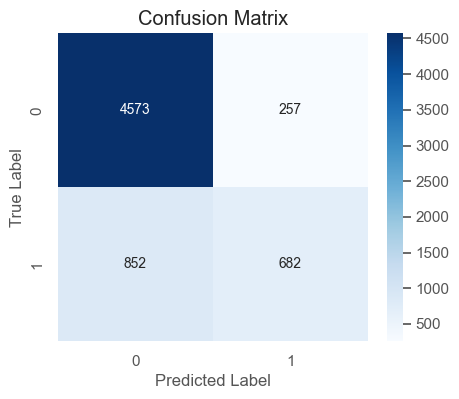

In [129]:
#lr=LogisticRegression()
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('Classification report')
print(classification_report(y_test, y_pred))
print()
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [131]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [133]:
param_grid = [{
    'classifier__splitter':['best','random'],
    'classifier__max_depth':[2,4,8,12],
    'classifier__min_samples_split':[6,8,10,12],
    'classifier__criterion':['entropy','gini'],
    'classifier__class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]
grid_search=GridSearchCV(pipeline,param_grid,cv=cv,scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.8245718724711237
{'classifier__class_weight': {0: 1, 1: 2}, 'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__min_samples_split': 6, 'classifier__splitter': 'best'}


In [135]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        class_weight= {0: 1, 1: 2}, criterion='gini', max_depth=4, min_samples_split= 6, splitter= 'best'
    ))
])

Accuracy: 82.9
Classification report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4830
           1       0.70      0.51      0.59      1534

    accuracy                           0.83      6364
   macro avg       0.78      0.72      0.74      6364
weighted avg       0.82      0.83      0.82      6364



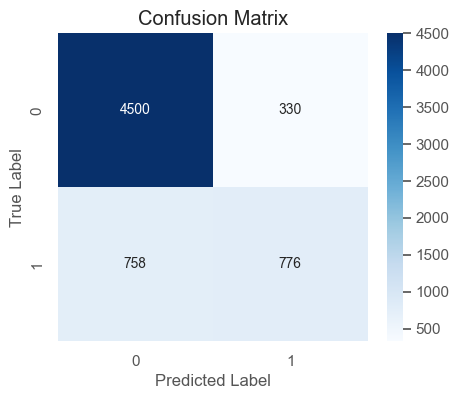

In [137]:
#dtc=DecisionTreeClassifier(class_weight= {0: 1, 1: 2}, criterion= 'entropy', max_depth= 8, min_samples_split= 6,splitter='random')
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('Classification report')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

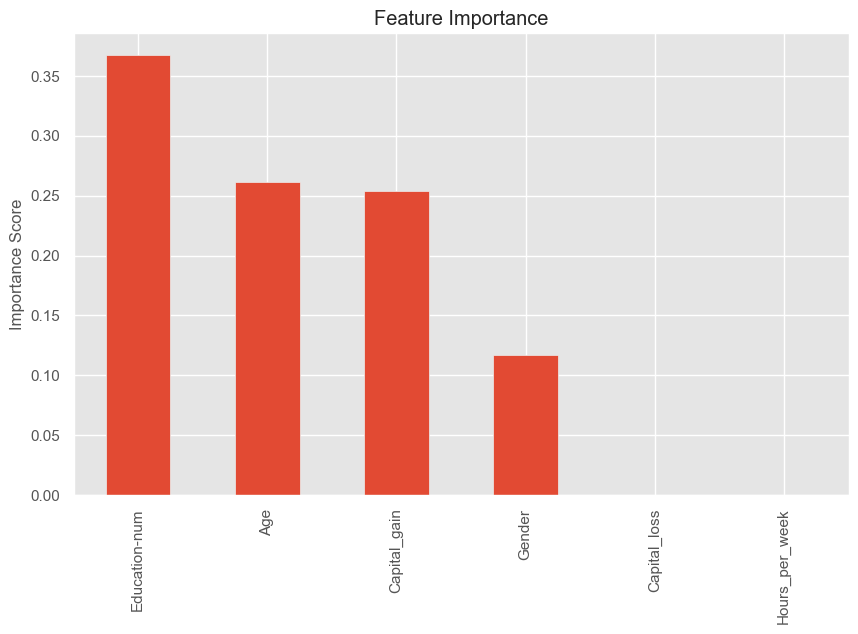

In [139]:
tree_model = pipeline.named_steps['classifier']
#ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['ohe']
#cat_feature_names = ohe.get_feature_names_out(cat_cols)
num_feature_names = num_cols
all_feature_names = np.concatenate([num_feature_names, binary_cols])

importances = tree_model.feature_importances_
features = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

In [101]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

ValueError: 
All the 36 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\data.py", line 407, in pandas_feature_info
    new_feature_types.append(_pandas_dtype_mapper[dtype.name])
                             ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'object'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\bsProject\PythonBS\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ~~~~~~~~~~~~~~~~~~~~~~~~~^
        missing=self.missing,
        ^^^^^^^^^^^^^^^^^^^^^
    ...<14 lines>...
        feature_types=self.feature_types,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\sklearn.py", line 628, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
        data=X,
    ...<9 lines>...
        ref=None,
    )
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\sklearn.py", line 1137, in _create_dmatrix
    return QuantileDMatrix(
        **kwargs, ref=ref, nthread=self.n_jobs, max_bin=self.max_bin
    )
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 1614, in __init__
    self._init(
    ~~~~~~~~~~^
        data,
        ^^^^^
    ...<12 lines>...
        max_quantile_blocks=max_quantile_batches,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 1678, in _init
    it.reraise()
    ~~~~~~~~~~^^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 572, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 553, in _handle_exception
    return fn()
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 640, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ~~~~~~~~~^^^^^^^^^^^^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\data.py", line 1654, in next
    input_data(**self.kwargs)
    ~~~~~~~~~~^^^^^^^^^^^^^^^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\core.py", line 620, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ~~~~~~~~~~~~~~~~^
        data,
        ^^^^^
    ...<2 lines>...
        self._enable_categorical,
        ^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\data.py", line 1707, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ~~~~~~~~~~~~~~~~~~~~^
        data, enable_categorical, feature_names, feature_types
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\data.py", line 640, in _transform_pandas_df
    feature_names, feature_types = pandas_feature_info(
                                   ~~~~~~~~~~~~~~~~~~~^
        data, meta, feature_names, feature_types, enable_categorical
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\data.py", line 409, in pandas_feature_info
    _invalid_dataframe_dtype(data)
    ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "C:\bsProject\PythonBS\Lib\site-packages\xgboost\data.py", line 372, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Workclass: object, Martial_Status: object, Occupation: object, Relationship: object, Race: object, Country: object


Accuracy: 84.54
Classification report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4482
           1       0.72      0.62      0.67      1487

    accuracy                           0.85      5969
   macro avg       0.80      0.77      0.78      5969
weighted avg       0.84      0.85      0.84      5969



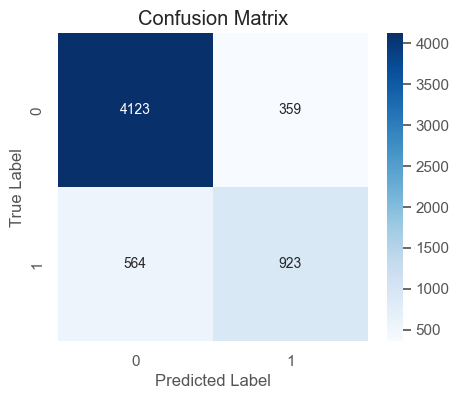

In [338]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',learning_rate=0.1, max_depth= 3, n_estimators= 200)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('Classification report')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()